In [182]:
import pandas as pd
import folium
import csv
from random import randrange
import os
import matplotlib.pyplot as plt

In [141]:
#dummy data

area_data = pd.read_csv('lsoa110.csv', sep = ';')
area_data.head()
print(area_data.columns)

rand = [randrange(10) for i in range(0, len(area_data))]

count_data = area_data[['LSOA11 Code']]
count_data["count"] = rand
count_data.columns = ["code", "count"]
count_data.head()

Index(['OBJECTID', 'LSOA11 Code', 'LSOA11 Name', 'LSOA11 Local name',
       'MSOA11 Code', 'Ward code', 'Area square mteres', 'Perimeter (m)',
       'MI_PRINX', 'geo_shape', 'geo_point_2d'],
      dtype='object')


/Users/Charlotte/.virtualenvs/bacteria/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,code,count
0,E01014527,7
1,E01014698,0
2,E01014576,0
3,E01014615,8
4,E01014703,3


In [142]:
m = folium.Map(location=[51.4545, -2.5879], zoom_start=12)
m

In [162]:
folium.Choropleth?

In [180]:
m = folium.Map(location=[51.4545, -2.5879], zoom_start=12)

m.choropleth(
    geo_data='LSOA110.geojson',
    name='choropleth',
    data=count_data,
    columns=['code', 'count'],
    key_on='feature.properties.lsoa11cd',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Count'
)

folium.LayerControl().add_to(m)

m.save('test.html')



# # Initialize the map:
# m = folium.Map(location=[37, -102], zoom_start=5)
 
# # Add the color for the chloropleth:
# m.choropleth(
#  geo_data='LSOA110.geojson',
#  name='choropleth',
#  data=count_data,
#  columns=['code', 'count'],
#  key_on='feature.properties.lsoa11cd id',
#  fill_color='YlGn',
#  fill_opacity=0.7,
#  line_opacity=0.2,
#  legend_name='Unemployment Rate (%)'
# )
# folium.LayerControl().add_to(m)
 
# # Save to html
# m.save('#292_folium_chloropleth_USA1.html')
# m

In [181]:
m

In [109]:
import json

# read file
with open('LSOA_Bristol.json', 'r') as myfile:
    data=myfile.read()

# parse file
obj = json.loads(data)

# show values
print("id: " + str(obj['feature.properties.id']))


KeyError: 'feature.properties.id'

In [116]:
 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = 'us-states.json'
 
# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
state_unemployment = 'US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)
state_data.head()
 

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [173]:
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['State', 'Unemployment'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Unemployment Rate (%)'
)
folium.LayerControl().add_to(m)
 
# Save to html
m.save('#292_folium_chloropleth_USA1.html')

In [174]:
m

In [122]:
data.head()

AttributeError: 'str' object has no attribute 'head'

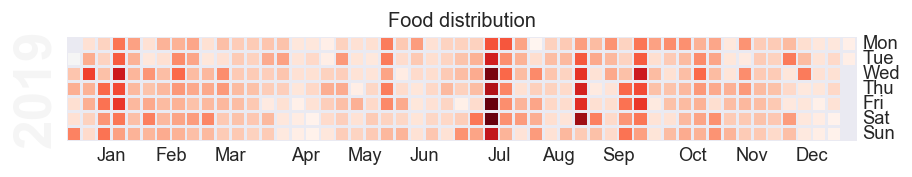

In [232]:
import calmap

# Import Data
df = pd.read_csv("heatmap_data.csv", parse_dates=['date'])
df.set_index('date', inplace=True)

# Plot
#plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(df['2019']['VIX.Close'], fig_kws={'figsize': (8,5), 'dpi':120}, 
                     subplot_kws={'title':'Food distribution'})
plt.savefig('time_heatmap.png')
plt.show()

In [260]:
m = folium.Map(location=[51.4545, -2.5879], zoom_start=13)
folium.Marker(
    location=[51.4445, -2.5879],
    popup='Mt. Hood Meadows',
    icon=folium.Icon(icon='cloud')
).add_to(m)

folium.Marker(
    location=[51.4548, -2.5929],
    popup='Timberline Lodge',
    icon=folium.Icon(color='green', icon='mug-hot')
).add_to(m)

folium.Marker(
    location=[51.4515, -2.6139],
    popup='Some Other Location',
    icon=folium.Icon(color='red', icon='home')
).add_to(m)

m

In [256]:
help(folium.Icon)

Help on class Icon in module folium.map:

class Icon(branca.element.MacroElement)
 |  Creates an Icon object that will be rendered
 |  using Leaflet.awesome-markers.
 |  
 |  Parameters
 |  ----------
 |  color : str, default 'blue'
 |      The color of the marker. You can use:
 |  
 |          ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
 |           'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
 |           'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
 |           'gray', 'black', 'lightgray']
 |  
 |  icon_color : str, default 'white'
 |      The color of the drawing on the marker. You can use colors above,
 |      or an html color code.
 |  icon : str, default 'info-sign'
 |      The name of the marker sign.
 |      See Font-Awesome website to choose yours.
 |      Warning : depending on the icon you choose you may need to adapt
 |      the `prefix` as well.
 |  angle : int, default 0
 |      The icon will be rotated by this amount of degrees.
 